In [5]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# parameters
s0= 1.0e4                                   # external nutrient
ns= 0.1                                     # nutrient effeciency (0.08 - 0.5, six equally log spaced pts)
nr= 7549.0                                  # ribosome length
nx= 300.0                                   # length of non-ribosomal proteins
gmax= 1260.0                                # gamma_max, max. transl. elongation rate
vt= 726.0                                   # max. nutrient import rate
Kt= 1.0e3                                   # nutrient import threshold
vm= 5800.0                                  # max. enzymatic rate
Km= 1.0e3                                   # enzymatic threshold
wr= 929.9678874564831                       # max. ribosome transcription rate
we= 4.139172187824451                       # = w_t = w_m, max. enzyme transcription rate
wq= 948.9349882947897                       # max. q-transcription rate
thetar= 426.8693338968694                   # ribosome transcription threshold
thetax= 4.379733394834643                   # theta_nr, non-ribosomal transcription threshold
Kq= 1.522190403737490e+05                   # q-autoinhibition threshold
nq= 4                                       # h_q, q-autoinhibition Hill coefficient
M= 1.0e8                                    # total cell mass
k_cm= 0.005990373118888                     # chloramphenicol-binding rate

v_iA = 3.520552264
v_iB = 1.627887442
v_K = 30.23369113
v_gS = 36.94717937
v_G = 8.530870395
v_cB = 3.434562992
v_J = 8.327680698

w_iA = 4136.103435121432/60
w_iB = 1924.1910398957054/60
w_K = 5986.209888432502/60
w_gS = 8547.881364727165/60
w_G = 5929.300975517141/60
w_cB = 4246.77533169639/60
w_J = 3387.0713162588904/60

ibpAL=137
ibpBL=142
dnaKL=637
GrosL=97
htpGL=624
clpBL=857
dnaJL=375

d_iA = .1
d_iB = .1
d_K = .1
d_J = .1
d_G = .1
d_cB = .1
d_gS = .1

# d_iA = 1
# d_iB = 1
# d_K = 1
# d_J = 1
# d_G = 1
# d_cB = 1
# d_gS = 1

cl= 0 # 0, 2, 4, 8, 12                      # zombie complex enzyme concentration
Kp= 180.1378030928276                       # defines K_gamma (transl. elongation threshold)
wp= 10*we  # 0                              # extra protein transcrip rate
# parameters= [thetar, k_cm, s0, gmax, cl, thetax, Kt, M, we, Km, vm, nx, Kq, Kp, vt, wr, wq, wp, nq, nr, ns]

# define rate constants
b= 0                                        # ???
dm= 0.1                                     # mRNA-degradation rate
kb= 1                                       # mRNA-ribosome binding rate 
ku= 1.0                                     # mRNA-ribosome unbinding rate
f= cl*k_cm                                  # zombie complex something rate
# rates= [b, dm, kb, ku, f]

# define initial conditions
rmr_0= 0
em_0= 0
rmp_0= 0
rmq_0= 0
rmt_0= 0
et_0= 0
rmm_0= 0
zmm_0= 0
zmr_0= 0
zmp_0= 0
zmq_0= 0
zmt_0= 0
mt_0= 0
mm_0= 0
q_0= 0
p_0= 0
si_0= 0
mq_0= 0
mp_0= 0
mr_0= 0
r_0= 10.0
a_0= 10000.0
iA_0=0
m_iA_0=0
c_iA_0=0
iB_0=0
m_iB_0=0
c_iB_0=0
K_0=0    
m_K_0  = 0
c_K_0 = 0
J_0  = 0
m_J_0  = 0
c_J_0  = 0
gS_0  = 0
m_gS_0 = 0
c_gS_0 = 0
G_0   = 0
m_G_0  = 0
c_G_0  = 0
cB_0  = 0
m_cB_0 = 0
c_cB_0= 0

init= [rmr_0, em_0, rmp_0, rmq_0, rmt_0, et_0, rmm_0, zmm_0, zmr_0, zmp_0, zmq_0, zmt_0, mt_0, mm_0, q_0, p_0, si_0, mq_0, mp_0, mr_0, r_0, a_0,iA_0,m_iA_0,c_iA_0,iB_0,m_iB_0,c_iB_0, K_0, m_K_0,c_K_0,J_0 ,m_J_0,c_J_0,gS_0,m_gS_0,c_gS_0,G_0,m_G_0 ,c_G_0 ,cB_0,m_cB_0,c_cB_0,0,0]

In [6]:
def TXsample(): 
    mean = 100
    std = 0
    sample = np.random.normal(mean, std)
    return(sample)

def TLsample(): 
    mean = 400
    std = 100
    sample = np.random.normal(mean, std)
    return(sample)

def ribsample(): 
    low = 0.0
    high = 0.022
    sample = np.random.uniform(low, high)
    return(sample)

dTL = 0.022
w_g = 1000 # nutrient level
h = 2 # transcrip parameter
n_g = 300
Kg = 100
d_g = np.log(2/4)
d_mg = np.log(2/2)

kiA = 0.732204364
kiB = 0.557686608 
kK = 0.178909618 
kb= 0.178909618 
kJ = 0.18600367
kG = 0.199411187
kcB = kb
kgS = kb

[16.607751740002115]
[4.3637047192295295]
[94.64998252872219]
[40.36778928352134]


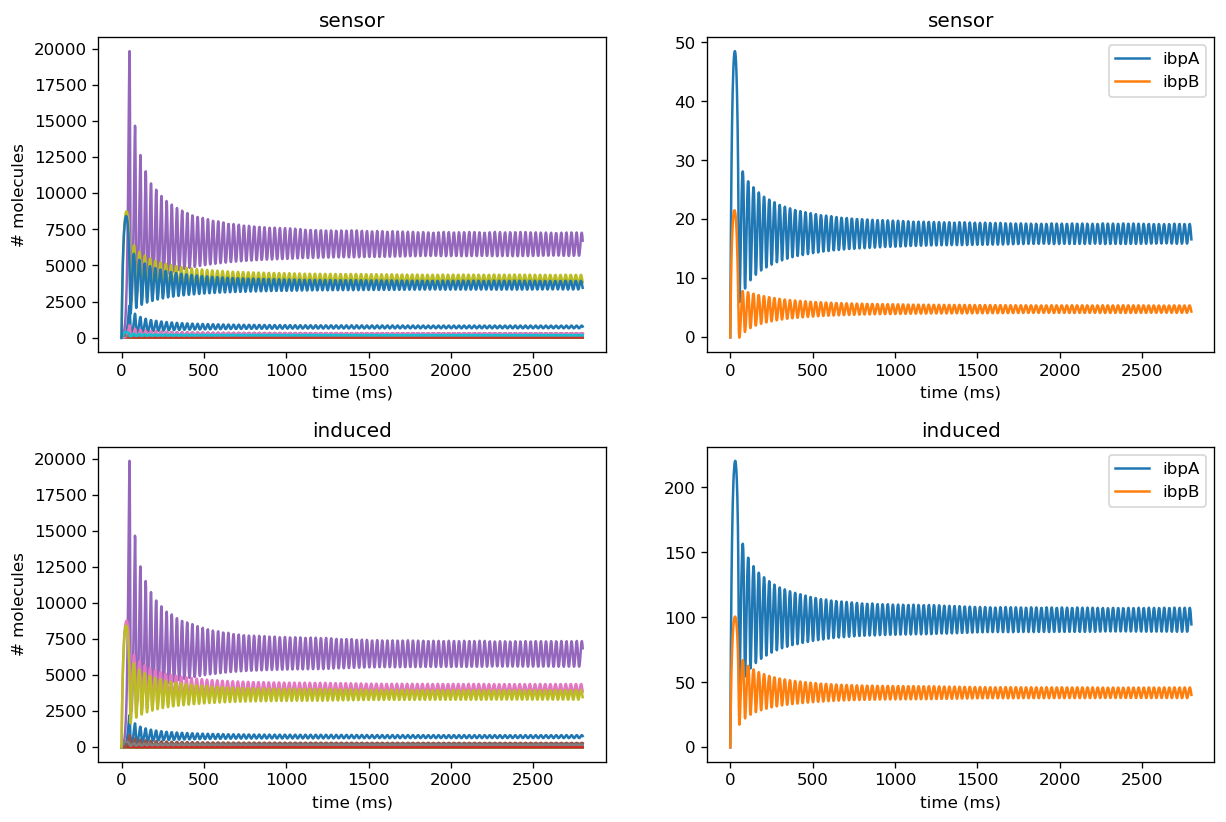

In [22]:
# phosphorylation.csv
# THIS IS FORphosphorylation
# -0.03568074591095446for untransformed
# -0.07298405986017366for sensor
# -0.08623323042989518for uninduced
# -0.11252045143501159for induced


fig, ax = plt.subplots(2, 2, dpi=120,figsize=(12,8))

for i in range(1,3): 
    if i == 1: 
        v_iA = 3.520552264*1.5480778060559335
        v_iB = 1.627887442*1.5480778060559335
        v_K = 30.23369113
        v_J = 8.327680698
        v_cB = 3.434562992
        v_gS = 36.94717937
        TLmod = -0.15132004358115428
        lon = 4.361438696438512
    if i == 2: 
        v_iA = 3.520552264*6.804889124543772
        v_iB = 1.627887442*6.804889124543772
        v_K = 30.23369113
        v_J = 8.327680698
        v_cB = 3.434562992
        v_gS = 36.94717937
        TLmod = -0.13927912437711448
        lon = -0.43879251115152573
        
    TLmod = 0
    TL=1

    TL=1

    def deriv(t,y):
        rmr= y[0]       # complex c_r b/w ribosome and mRNA for protein p_r <- ribosome bound ribosomes
        em= y[1]        # metabolic enzyme
        rmp= y[2]       # complex c_p for extra protein p
        rmq= y[3]       # complex c_q b/w ribosome and mRNA for protein p_q <- ribosome bound housekeeping proteins
        rmt= y[4]       # complex c_t b/w ribosome and mRNA for protein p_t <- ribosome bound transporter enzymes
        et= y[5]        # transport enzyme
        rmm= y[6]       # complex c_m b/w ribosome and mRNA for protein p_m <- ribosome bound metabolic enzymes
        zmm= y[7]       # zombie complex metabolic enzyme
        zmr= y[8]       # zombie complex ribosome (no longer available to translation, to model transl. inh)
        zmp= y[9]       # zombie complex extra protein
        zmq= y[10]      # zombie complex housekeeping
        zmt= y[11]      # zombie complex transport enzyme
        mt= y[12]       # free mRNAs for transport enzymes
        mm= y[13]       # free mRNAs for metabolic enzymes
        q= y[14]        # growth indep proteins
        p= y[15]        # extra protein
        si= y[16]       # internal nutrient
        mq= y[17]       # free mRNAs for housekeeping proteins
        mp= y[18]       # free mRNAs for duplicate protein
        mr= y[19]       # free mRNAs for ribosomes
        r= y[20]        # ribosomes
        a= y[21]        # total energy pool/ATP
        iA   = y[22]      # ibpA proteins 
        m_iA = y[23]      # mrna for ibpA
        c_iA = y[24]  
        iB = y[25]
        m_iB=y[26]
        c_iB=y[27]
        K    = y[28]      # dnaK proteins
        m_K  = y[29]      # dnaK mrna
        c_K  = y[30]      # dnak mrna ribosomal complex 
        J    = y[31]      # dnaJ proteins
        m_J  = y[32]      # dnaJ mrna
        c_J  = y[33]      # dnaJ mrna ribosomal complex
        gS   = y[34]      # groS proteins
        m_gS = y[35]      # groS mrna
        c_gS = y[36]      # groS ribosome mrna complex
        G    = y[37]      # HtpG protein
        m_G  = y[38]      # mrna HtpG mrna
        c_G  = y[39]      # ribosome mrna complex htpG
        cB   = y[40]      # clpB proteins
        m_cB = y[41]      # mrna clpb
        c_cB = y[42]      # mrna ribosome complex clpb
        lon = y[43]
        hslU = y[44]
        Kgamma= gmax/Kp            # K_gamma
        gamma= gmax*a/(Kgamma + a) # gamma(a)
        ttrate= (rmq + rmr + rmp + rmt + rmm + TL*(c_iA+c_iB+c_K+c_gS+c_G+c_cB))*gamma  # gamma(a)*sum(c_x)
        #lam= (ttrate/M)*(1/(4400-6))*(c_iA+c_iB+c_K+c_gS+c_G+c_cB)             # lambda
        lam = ttrate/(M) 
        fr= (nr*(r + rmr + rmp + rmt + rmm + rmq + zmr + zmp + zmt + zmm + zmq)    # 
             / ( nr*(r + rmr + rmp + rmt + rmm + rmq + zmr + zmp + zmt + zmm + zmq) + nx * (p + q + et + em)))
        nucat= em*vm*si/(Km + si)  # v_cat
        markergeneburden = (1/(4400-6))*(v_iA*ibpAL+v_iB*ibpBL+v_K*dnaKL+v_gS*GrosL+v_G*htpGL+v_cB*clpBL+v_J*dnaJL)
        markergeneproteins = (1/(4400-6))*(v_iA-kiA*r*m_iA+c_iA+v_iB-kiB*r*m_iB+c_iB+v_K-kK*r*m_K+c_K+v_J-kJ*r*m_J+c_J+v_gS-kgS*r*m_gS+c_gS+v_G-kG*r*m_G+c_G+v_cB-kcB*r*m_cB+c_cB)
        p_sum = iA+iB+K+J+gS+cB+G+em+et+q+p+r
        protease = 0.001
        dL = 0.01
        dH = 0.01
        
        

        f0 = kb*r*mr+b*zmr-ku*rmr-gamma/nr*rmr-f*rmr-lam*rmr          # c_r dot
        f1 = (gamma/nx-TLmod)*rmm-lam*em-lon*dL-hslU*dH                       # e_m dot
        f2 = kb*r*mp+b*zmp-ku*rmp-gamma/nx*rmp-f*rmp-lam*rmp          # c_q dot
        f3 = kb*r*mq+b*zmq-ku*rmq-gamma/nx*rmq-f*rmq-lam*rmq          # m_p dot
        f4 = kb*r*mt+b*zmt-ku*rmt-gamma/nx*rmt-f*rmt-lam*rmt          # c_t dot
        f5 = (gamma/nx-TLmod)*rmt-lam*et-lon*dL-hslU*dH                        # e_t dot
        f6 = kb*r*mm+b*zmm-ku*rmm-gamma/nx*rmm-f*rmm-lam*rmm          # c_m dot
        f7 = f*rmm-b*zmm-lam*zmm                                      # zm_m dot
        f8 = f*rmr-b*zmr-lam*zmr                                      # zm_r dot
        f9 = f*rmp-b*zmp-lam*zmp                                      # zm_p dot
        f10 = f*rmq-b*zmq-lam*zmq                                     # zm_q dot
        f11 = f*rmt-b*zmt-lam*zmt                                     # zm_t dot
        f12 = (we*a/(thetax + a))+ku*rmt+gamma/nx*rmt-kb*r*mt-dm*mt-lam*mt                  # m_t dot
        f13 = (we*a/(thetax + a))+ku*rmm+gamma/nx*rmm-kb*r*mm-dm*mm-lam*mm                  # m_m dot
        f14 = (gamma/nx-TLmod)*rmq-lam*q-lon*dL-hslU*dH                                      # q dot
        f16 = (et*vt*s0/(Kt + s0))-nucat-lam*si                       # s_i dot
        f17 = (wq*a/(thetax + a)/(1 + (q/Kq)**nq))+ku*rmq+gamma/nx*rmq-kb*r*mq-dm*mq-lam*mq # m_q dot
        f18 = (wp*a/(thetax + a))+ku*rmp+gamma/nx*rmp-kb*r*mp-dm*mp-lam*mp                  # m_p dot
        f19 = (wr*a/(thetar + a))+ku*rmr+gamma/nr*rmr-kb*r*mr-dm*mr-lam*mr                  # m_r dot
        f20 = (ku*(rmr+rmt+rmm+rmp+rmq)+2*gamma/nr*rmr+gamma/nx*rmt+gamma/nx*rmm+gamma/nx*rmp+gamma/nx*rmq
               -kb*r*(mr+mt+mm+mp+mq)-lam*r)+markergeneproteins                          # r dot
        f22 = v_iA - (lam + d_iA) * iA - lon*dL-hslU*dH                                 # ibpA
        f23 = w_iA - (lam + dm) * m_iA + v_iA - kiA*m_iA + ku*c_iA
        f24 = -lam*c_iA + kiA*r*m_iA - ku*c_iA - v_iA
        f25  = v_iB - (lam + d_iB) * iB - lon*dL-hslU*dH                               # ibpB
        f26 = w_iB - (lam + dm) * m_iB + v_iB - kiB*m_iB + ku*c_iB
        f27 = -lam*c_iB + kiB*r*m_iB - ku*c_iB - v_iB   
        f28 = v_K - (lam + d_K) * K - lon*dL-hslU*dH                                   # dnaK
        f29  = w_K - (lam + dm) * m_K + v_K - kK*m_K + ku*c_K
        f30  = -lam*c_K + kK*r*m_K - ku*c_K - v_K
        f31  = v_J - (lam + d_J) * J - lon*dL-hslU*dH                                   # dnaJ
        f32 = w_J - (lam + dm) * m_J + v_J - kJ*m_J + ku*c_J
        f33 = -lam*c_J + kJ*r*m_J - ku*c_J - v_J
        f34  = v_gS - (lam + d_gS) * gS - lon*dL-hslU*dH                                # groS
        f35  = w_gS - (lam + dm) * m_gS + v_gS - kgS*m_gS + ku*c_gS
        f36 = -lam*c_gS + kgS*r*m_gS - ku*c_gS - v_gS
        f37  = v_G - (lam + d_G) * G - lon*dL-hslU*dH                                   # htpG
        f38 = w_G - (lam + dm) * m_G + v_G - kG*m_G + ku*c_G
        f39 = -lam*c_G + kG*r*m_G - ku*c_G - v_G
#         f40  = c_cB*(gamma/clpBL) - (lam + d_cB) * cB - lon*dL-hslU*dH                                  # clpB
        f40  = v_cB - (lam + d_cB) * cB - lon*dL-hslU*dH                                  # clpB
        f41 = w_cB - (lam + dm) * m_cB + v_cB - kcB*m_cB + ku*c_cB
        f42 = -lam*c_cB + kcB*r*m_cB - ku*c_cB - v_cB 
        f15 = (gamma/nx-TLmod)*rmp-lam*p - lon*dL-hslU*dH                                 # p dot
        f21 = ns*nucat-ttrate-lam*a                        # a dot
        f43 = p_sum*protease-lon*dm
        f44 = p_sum*protease-hslU*dm

        return [f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44]

    sol = sp.integrate.solve_ivp(fun=deriv, t_span=[0, 2800], y0=init,method='BDF')#, t_eval=t)

    rmr1= sol.y[:,0]       # complex c_r b/w ribosome and mRNA for protein p_r <- ribosome bound ribosomes
    em1= sol.y[:,1]        # metabolic enzyme
    rmp1= sol.y[:,2]       # complex c_p for duplicate protein p
    rmq1= sol.y[:,3]       # complex c_q b/w ribosome and mRNA for protein p_q <- ribosome bound housekeeping proteins
    rmt1= sol.y[:,4]       # complex c_t b/w ribosome and mRNA for protein p_t <- ribosome bound transporter enzymes
    et1= sol.y[:,5]        # transport enzyme
    rmm1= sol.y[:,6]       # complex c_m b/w ribosome and mRNA for protein p_m <- ribosome bound metabolic enzymes
    zmm1= sol.y[:,7]       # zombie complex metabolic enzyme
    zmr1= sol.y[:,8]       # zombie complex ribosome (no longer available to translation, to model transl. inh)
    zmp1= sol.y[:,9]       # zombie complex duplicate protein
    zmq1= sol.y[:,10]      # zombie complex housekeeping
    zmt1= sol.y[:,11]      # zombie complex transport enzyme
    mt1= sol.y[:,12]       # free mRNAs for transport enzymes
    mm1= sol.y[:,13]       # free mRNAs for metabolic enzymes
    q1= sol.y[:,14]        # growth indep proteins
    p1 = sol.y[:,15]
    si1= sol.y[:,16]       # internal nutrient
    mq1= sol.y[:,17]       # free mRNAs for housekeeping proteins
    mp1= sol.y[:,18]       # free mRNAs for duplicate protein
    mr1= sol.y[:,19]       # free mRNAs for ribosomes
    r1= sol.y[:,20]        # ribosomes
    a1= sol.y[:,21]        # total energy pool/ATP
    iAp= sol.y[:,22]       # ibpA Proteins
    iBp= sol.y[:,25]       #ibpB Proteins
    DnaKp=sol.y[:,28]      #DnaK Proteins
    DnaJp=sol.y[:,31]      #DnaJ Proteins
    GroSp=sol.y[:,34]      #GroS Proteins
    HtpGp=sol.y[:,37]      #HtpG Proteins
    clpBp=sol.y[:,40]      #clpB Proteins

    fig.subplots_adjust(hspace=.3)
    fig.subplots_adjust(wspace=.2)
    
    if i == 1: 
        for j in range(16):
            ax[0,0].plot(sol.t, sol.y[j])
            
        for j in range(2):
            ax[0,0].plot(sol.t, sol.y[15+j])

        for j in range(3):
            ax[0,0].plot(sol.t, sol.y[17+j])
    
        ax[0,1].plot(sol.t,sol.y[22],label='ibpA')
        ax[0,1].plot(sol.t,sol.y[25],label='ibpB')
#         ax[1,1].plot(sol.t,sol.y[28],label='dnaK')
#         ax[1,1].plot(sol.t,sol.y[31],label='dnaJ')
#         ax[1,1].plot(sol.t,sol.y[34],label='groS')
#         ax[1,1].plot(sol.t,sol.y[37],label='htpG')
#         ax[1,1].plot(sol.t,sol.y[40],label='clpB')
#         ax[1,1].set_ylim(0,60)
        ax[0,1].legend()
    
        ax[0,0].set_title('sensor')
        ax[0,1].set_title('sensor')
        ax[0,0].set_xlabel('time (ms)')
        ax[0,1].set_xlabel('time (ms)')
        ax[0,0].set_ylabel('# molecules')
        s = sol.y[22].tolist()
        s = s[-1:]
        print(s)
        p = sol.y[25].tolist()
        p = p[-1:]
        print(p)
        
    if i == 2: 
        for j in range(16):
            ax[1,0].plot(sol.t, sol.y[j])
            
        for j in range(3):
            ax[1,0].plot(sol.t, sol.y[17+j])
            
        ax[1,1].plot(sol.t,sol.y[22],label='ibpA')
        ax[1,1].plot(sol.t,sol.y[25],label='ibpB')
#         ax[3,1].plot(sol.t,sol.y[28],label='dnaK')
#         ax[3,1].plot(sol.t,sol.y[31],label='dnaJ')
#         ax[3,1].plot(sol.t,sol.y[34],label='groS')
#         ax[3,1].plot(sol.t,sol.y[37],label='htpG')
#         ax[3,1].plot(sol.t,sol.y[40],label='clpB')
#         ax[3,1].set_ylim(0,60)
        ax[1,1].legend()
    
        ax[1,0].set_title('induced')
        ax[1,1].set_title('induced')
        ax[1,0].set_xlabel('time (ms)')
        ax[1,1].set_xlabel('time (ms)')
        ax[1,0].set_ylabel('# molecules')
        k = sol.y[22].tolist()
        k = k[-1:]
        print(k)
        d = sol.y[25].tolist()
        d = d[-1:]
        print(d)
    
            
plt.savefig("ipbAB.pdf",bbox_inches = "tight")
plt.show()

In [25]:
k[0]/s[0]

5.699144833719084

In [26]:
d[0]/p[0]

9.250806798551853

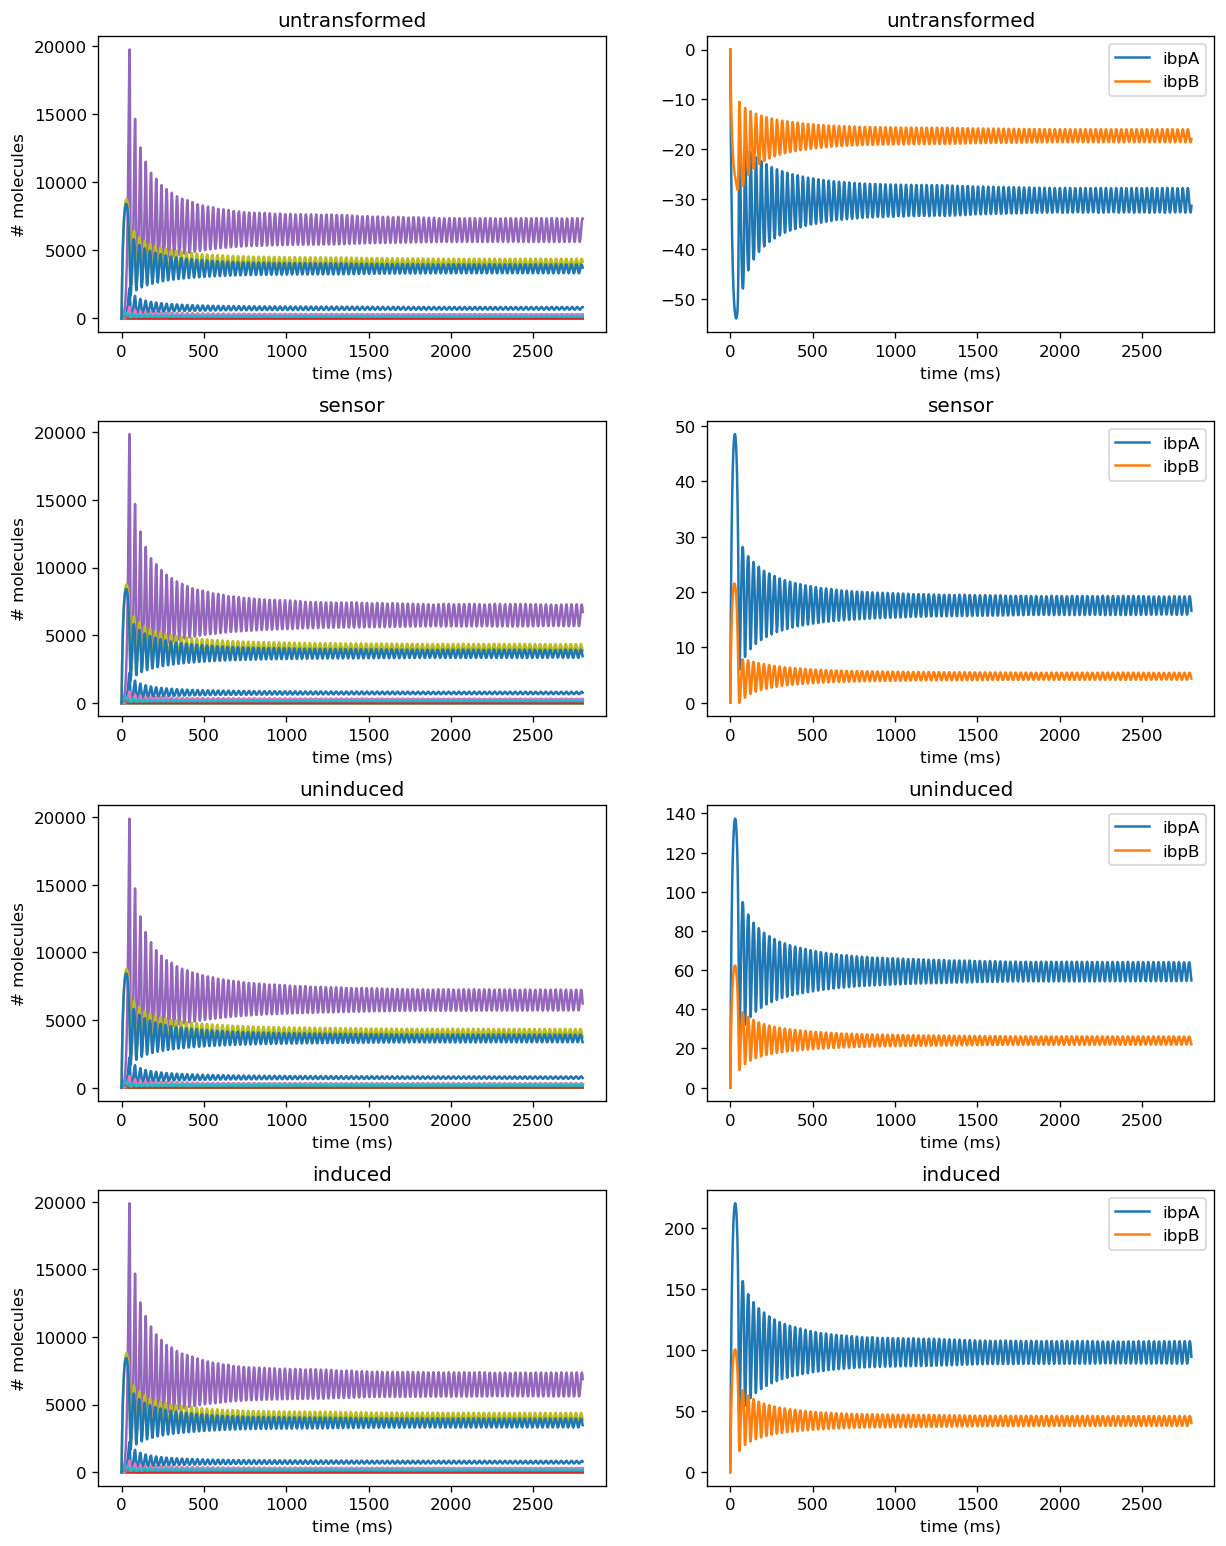

In [14]:
# phosphorylation.csv
# THIS IS FORphosphorylation
# -0.03568074591095446for untransformed
# -0.07298405986017366for sensor
# -0.08623323042989518for uninduced
# -0.11252045143501159for induced


fig, ax = plt.subplots(4, 2, dpi=120,figsize=(12,16))

for i in range(5): 
    if i == 1: 
        v_iA = 3.520552264*-1.5672330874407892
        v_iB = 1.627887442*-1.5672330874407892
        v_K = 30.23369113
        v_J = 8.327680698
        v_cB = 3.434562992
        v_gS = 36.94717937
        TLmod = -0.08734931670083161
        lon = -0.13105120531690082
    if i == 2: 
        v_iA = 3.520552264*1.5480778060559335
        v_iB = 1.627887442*1.5480778060559335
        v_K = 30.23369113
        v_J = 8.327680698
        v_cB = 3.434562992
        v_gS = 36.94717937
        TLmod = -0.15132004358115428
        lon = 4.361438696438512
    if i == 3: 
        v_iA = 3.520552264*4.267202390068668
        v_iB = 1.627887442*4.267202390068668
        v_K = 30.23369113
        v_J = 8.327680698
        v_cB = 3.434562992
        v_gS = 36.94717937
        TLmod = 0.10203552364048463
        lon = -0.7766854387526456
    if i == 4: 
        v_iA = 3.520552264*6.804889124543772
        v_iB = 1.627887442*6.804889124543772
        v_K = 30.23369113
        v_J = 8.327680698
        v_cB = 3.434562992
        v_gS = 36.94717937
        TLmod = -0.13927912437711448
        lon = -0.43879251115152573
        
    TLmod = 0
    TL=1

    TL=1

    def deriv(t,y):
        rmr= y[0]       # complex c_r b/w ribosome and mRNA for protein p_r <- ribosome bound ribosomes
        em= y[1]        # metabolic enzyme
        rmp= y[2]       # complex c_p for extra protein p
        rmq= y[3]       # complex c_q b/w ribosome and mRNA for protein p_q <- ribosome bound housekeeping proteins
        rmt= y[4]       # complex c_t b/w ribosome and mRNA for protein p_t <- ribosome bound transporter enzymes
        et= y[5]        # transport enzyme
        rmm= y[6]       # complex c_m b/w ribosome and mRNA for protein p_m <- ribosome bound metabolic enzymes
        zmm= y[7]       # zombie complex metabolic enzyme
        zmr= y[8]       # zombie complex ribosome (no longer available to translation, to model transl. inh)
        zmp= y[9]       # zombie complex extra protein
        zmq= y[10]      # zombie complex housekeeping
        zmt= y[11]      # zombie complex transport enzyme
        mt= y[12]       # free mRNAs for transport enzymes
        mm= y[13]       # free mRNAs for metabolic enzymes
        q= y[14]        # growth indep proteins
        p= y[15]        # extra protein
        si= y[16]       # internal nutrient
        mq= y[17]       # free mRNAs for housekeeping proteins
        mp= y[18]       # free mRNAs for duplicate protein
        mr= y[19]       # free mRNAs for ribosomes
        r= y[20]        # ribosomes
        a= y[21]        # total energy pool/ATP
        iA   = y[22]      # ibpA proteins 
        m_iA = y[23]      # mrna for ibpA
        c_iA = y[24]  
        iB = y[25]
        m_iB=y[26]
        c_iB=y[27]
        K    = y[28]      # dnaK proteins
        m_K  = y[29]      # dnaK mrna
        c_K  = y[30]      # dnak mrna ribosomal complex 
        J    = y[31]      # dnaJ proteins
        m_J  = y[32]      # dnaJ mrna
        c_J  = y[33]      # dnaJ mrna ribosomal complex
        gS   = y[34]      # groS proteins
        m_gS = y[35]      # groS mrna
        c_gS = y[36]      # groS ribosome mrna complex
        G    = y[37]      # HtpG protein
        m_G  = y[38]      # mrna HtpG mrna
        c_G  = y[39]      # ribosome mrna complex htpG
        cB   = y[40]      # clpB proteins
        m_cB = y[41]      # mrna clpb
        c_cB = y[42]      # mrna ribosome complex clpb
        lon = y[43]
        hslU = y[44]
        Kgamma= gmax/Kp            # K_gamma
        gamma= gmax*a/(Kgamma + a) # gamma(a)
        ttrate= (rmq + rmr + rmp + rmt + rmm + TL*(c_iA+c_iB+c_K+c_gS+c_G+c_cB))*gamma  # gamma(a)*sum(c_x)
        #lam= (ttrate/M)*(1/(4400-6))*(c_iA+c_iB+c_K+c_gS+c_G+c_cB)             # lambda
        lam = ttrate/(M) 
        fr= (nr*(r + rmr + rmp + rmt + rmm + rmq + zmr + zmp + zmt + zmm + zmq)    # 
             / ( nr*(r + rmr + rmp + rmt + rmm + rmq + zmr + zmp + zmt + zmm + zmq) + nx * (p + q + et + em)))
        nucat= em*vm*si/(Km + si)  # v_cat
        markergeneburden = (1/(4400-6))*(v_iA*ibpAL+v_iB*ibpBL+v_K*dnaKL+v_gS*GrosL+v_G*htpGL+v_cB*clpBL+v_J*dnaJL)
        markergeneproteins = (1/(4400-6))*(v_iA-kiA*r*m_iA+c_iA+v_iB-kiB*r*m_iB+c_iB+v_K-kK*r*m_K+c_K+v_J-kJ*r*m_J+c_J+v_gS-kgS*r*m_gS+c_gS+v_G-kG*r*m_G+c_G+v_cB-kcB*r*m_cB+c_cB)
        p_sum = iA+iB+K+J+gS+cB+G+em+et+q+p+r
        protease = 0.001
        dL = 0.01
        dH = 0.01
        
        

        f0 = kb*r*mr+b*zmr-ku*rmr-gamma/nr*rmr-f*rmr-lam*rmr          # c_r dot
        f1 = (gamma/nx-TLmod)*rmm-lam*em-lon*dL-hslU*dH                       # e_m dot
        f2 = kb*r*mp+b*zmp-ku*rmp-gamma/nx*rmp-f*rmp-lam*rmp          # c_q dot
        f3 = kb*r*mq+b*zmq-ku*rmq-gamma/nx*rmq-f*rmq-lam*rmq          # m_p dot
        f4 = kb*r*mt+b*zmt-ku*rmt-gamma/nx*rmt-f*rmt-lam*rmt          # c_t dot
        f5 = (gamma/nx-TLmod)*rmt-lam*et-lon*dL-hslU*dH                        # e_t dot
        f6 = kb*r*mm+b*zmm-ku*rmm-gamma/nx*rmm-f*rmm-lam*rmm          # c_m dot
        f7 = f*rmm-b*zmm-lam*zmm                                      # zm_m dot
        f8 = f*rmr-b*zmr-lam*zmr                                      # zm_r dot
        f9 = f*rmp-b*zmp-lam*zmp                                      # zm_p dot
        f10 = f*rmq-b*zmq-lam*zmq                                     # zm_q dot
        f11 = f*rmt-b*zmt-lam*zmt                                     # zm_t dot
        f12 = (we*a/(thetax + a))+ku*rmt+gamma/nx*rmt-kb*r*mt-dm*mt-lam*mt                  # m_t dot
        f13 = (we*a/(thetax + a))+ku*rmm+gamma/nx*rmm-kb*r*mm-dm*mm-lam*mm                  # m_m dot
        f14 = (gamma/nx-TLmod)*rmq-lam*q-lon*dL-hslU*dH                                      # q dot
        f16 = (et*vt*s0/(Kt + s0))-nucat-lam*si                       # s_i dot
        f17 = (wq*a/(thetax + a)/(1 + (q/Kq)**nq))+ku*rmq+gamma/nx*rmq-kb*r*mq-dm*mq-lam*mq # m_q dot
        f18 = (wp*a/(thetax + a))+ku*rmp+gamma/nx*rmp-kb*r*mp-dm*mp-lam*mp                  # m_p dot
        f19 = (wr*a/(thetar + a))+ku*rmr+gamma/nr*rmr-kb*r*mr-dm*mr-lam*mr                  # m_r dot
        f20 = (ku*(rmr+rmt+rmm+rmp+rmq)+2*gamma/nr*rmr+gamma/nx*rmt+gamma/nx*rmm+gamma/nx*rmp+gamma/nx*rmq
               -kb*r*(mr+mt+mm+mp+mq)-lam*r)+markergeneproteins                          # r dot
        f22 = v_iA - (lam + d_iA) * iA - lon*dL-hslU*dH                                 # ibpA
        f23 = w_iA - (lam + dm) * m_iA + v_iA - kiA*m_iA + ku*c_iA
        f24 = -lam*c_iA + kiA*r*m_iA - ku*c_iA - v_iA
        f25  = v_iB - (lam + d_iB) * iB - lon*dL-hslU*dH                               # ibpB
        f26 = w_iB - (lam + dm) * m_iB + v_iB - kiB*m_iB + ku*c_iB
        f27 = -lam*c_iB + kiB*r*m_iB - ku*c_iB - v_iB   
        f28 = v_K - (lam + d_K) * K - lon*dL-hslU*dH                                   # dnaK
        f29  = w_K - (lam + dm) * m_K + v_K - kK*m_K + ku*c_K
        f30  = -lam*c_K + kK*r*m_K - ku*c_K - v_K
        f31  = v_J - (lam + d_J) * J - lon*dL-hslU*dH                                   # dnaJ
        f32 = w_J - (lam + dm) * m_J + v_J - kJ*m_J + ku*c_J
        f33 = -lam*c_J + kJ*r*m_J - ku*c_J - v_J
        f34  = v_gS - (lam + d_gS) * gS - lon*dL-hslU*dH                                # groS
        f35  = w_gS - (lam + dm) * m_gS + v_gS - kgS*m_gS + ku*c_gS
        f36 = -lam*c_gS + kgS*r*m_gS - ku*c_gS - v_gS
        f37  = v_G - (lam + d_G) * G - lon*dL-hslU*dH                                   # htpG
        f38 = w_G - (lam + dm) * m_G + v_G - kG*m_G + ku*c_G
        f39 = -lam*c_G + kG*r*m_G - ku*c_G - v_G
#         f40  = c_cB*(gamma/clpBL) - (lam + d_cB) * cB - lon*dL-hslU*dH                                  # clpB
        f40  = v_cB - (lam + d_cB) * cB - lon*dL-hslU*dH                                  # clpB
        f41 = w_cB - (lam + dm) * m_cB + v_cB - kcB*m_cB + ku*c_cB
        f42 = -lam*c_cB + kcB*r*m_cB - ku*c_cB - v_cB 
        f15 = (gamma/nx-TLmod)*rmp-lam*p - lon*dL-hslU*dH                                 # p dot
        f21 = ns*nucat-ttrate-lam*a                        # a dot
        f43 = p_sum*protease-lon*dm
        f44 = p_sum*protease-hslU*dm

        return [f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44]

    sol = sp.integrate.solve_ivp(fun=deriv, t_span=[0, 2800], y0=init,method='BDF')#, t_eval=t)

    rmr1= sol.y[:,0]       # complex c_r b/w ribosome and mRNA for protein p_r <- ribosome bound ribosomes
    em1= sol.y[:,1]        # metabolic enzyme
    rmp1= sol.y[:,2]       # complex c_p for duplicate protein p
    rmq1= sol.y[:,3]       # complex c_q b/w ribosome and mRNA for protein p_q <- ribosome bound housekeeping proteins
    rmt1= sol.y[:,4]       # complex c_t b/w ribosome and mRNA for protein p_t <- ribosome bound transporter enzymes
    et1= sol.y[:,5]        # transport enzyme
    rmm1= sol.y[:,6]       # complex c_m b/w ribosome and mRNA for protein p_m <- ribosome bound metabolic enzymes
    zmm1= sol.y[:,7]       # zombie complex metabolic enzyme
    zmr1= sol.y[:,8]       # zombie complex ribosome (no longer available to translation, to model transl. inh)
    zmp1= sol.y[:,9]       # zombie complex duplicate protein
    zmq1= sol.y[:,10]      # zombie complex housekeeping
    zmt1= sol.y[:,11]      # zombie complex transport enzyme
    mt1= sol.y[:,12]       # free mRNAs for transport enzymes
    mm1= sol.y[:,13]       # free mRNAs for metabolic enzymes
    q1= sol.y[:,14]        # growth indep proteins
    p1 = sol.y[:,15]
    si1= sol.y[:,16]       # internal nutrient
    mq1= sol.y[:,17]       # free mRNAs for housekeeping proteins
    mp1= sol.y[:,18]       # free mRNAs for duplicate protein
    mr1= sol.y[:,19]       # free mRNAs for ribosomes
    r1= sol.y[:,20]        # ribosomes
    a1= sol.y[:,21]        # total energy pool/ATP
    iAp= sol.y[:,22]       # ibpA Proteins
    iBp= sol.y[:,25]       #ibpB Proteins
    DnaKp=sol.y[:,28]      #DnaK Proteins
    DnaJp=sol.y[:,31]      #DnaJ Proteins
    GroSp=sol.y[:,34]      #GroS Proteins
    HtpGp=sol.y[:,37]      #HtpG Proteins
    clpBp=sol.y[:,40]      #clpB Proteins

    fig.subplots_adjust(hspace=.3)
    fig.subplots_adjust(wspace=.2)
    
    if i == 1: 
        for j in range(16):
            ax[0,0].plot(sol.t, sol.y[j])
            
        for j in range(2):
            ax[0,0].plot(sol.t, sol.y[15+j])

        for j in range(3):
            ax[0,0].plot(sol.t, sol.y[17+j])
            
        ax[0,1].plot(sol.t,sol.y[22],label='ibpA')
        ax[0,1].plot(sol.t,sol.y[25],label='ibpB')
#         ax[0,1].plot(sol.t,sol.y[28],label='dnaK')
#         ax[0,1].plot(sol.t,sol.y[31],label='dnaJ')
#         ax[0,1].plot(sol.t,sol.y[34],label='groS')
#         ax[0,1].plot(sol.t,sol.y[37],label='htpG')
#         ax[0,1].plot(sol.t,sol.y[40],label='clpB')
#         ax[0,1].set_ylim(0,60)
#         ax[0,1].plot(sol.t,sol.y[16],label='test')
        ax[0,1].legend()

        ax[0,0].set_title('untransformed')
        ax[0,1].set_title('untransformed')
        ax[0,0].set_xlabel('time (ms)')
        ax[0,1].set_xlabel('time (ms)')
        ax[0,0].set_ylabel('# molecules')

    
    if i == 2: 
        for j in range(16):
            ax[1,0].plot(sol.t, sol.y[j])
            
        for j in range(2):
            ax[1,0].plot(sol.t, sol.y[15+j])

        for j in range(3):
            ax[1,0].plot(sol.t, sol.y[17+j])
    
        ax[1,1].plot(sol.t,sol.y[22],label='ibpA')
        ax[1,1].plot(sol.t,sol.y[25],label='ibpB')
#         ax[1,1].plot(sol.t,sol.y[28],label='dnaK')
#         ax[1,1].plot(sol.t,sol.y[31],label='dnaJ')
#         ax[1,1].plot(sol.t,sol.y[34],label='groS')
#         ax[1,1].plot(sol.t,sol.y[37],label='htpG')
#         ax[1,1].plot(sol.t,sol.y[40],label='clpB')
#         ax[1,1].set_ylim(0,60)
        ax[1,1].legend()
    
        ax[1,0].set_title('sensor')
        ax[1,1].set_title('sensor')
        ax[1,0].set_xlabel('time (ms)')
        ax[1,1].set_xlabel('time (ms)')
        ax[1,0].set_ylabel('# molecules')
    
    if i == 3: 
        for j in range(16):
            ax[2,0].plot(sol.t, sol.y[j])
            
        for j in range(2):
            ax[2,0].plot(sol.t, sol.y[15+j])

        for j in range(3):
            ax[2,0].plot(sol.t, sol.y[17+j])
        
        ax[2,1].plot(sol.t,sol.y[22],label='ibpA')
        ax[2,1].plot(sol.t,sol.y[25],label='ibpB')
#         ax[2,1].plot(sol.t,sol.y[28],label='dnaK')
#         ax[2,1].plot(sol.t,sol.y[31],label='dnaJ')
#         ax[2,1].plot(sol.t,sol.y[34],label='groS')
#         ax[2,1].plot(sol.t,sol.y[37],label='htpG')
#         ax[2,1].plot(sol.t,sol.y[40],label='clpB')
#         ax[2,1].set_ylim(0,60)
        ax[2,1].legend()
    
        ax[2,0].set_title('uninduced')
        ax[2,1].set_title('uninduced')
        ax[2,0].set_xlabel('time (ms)')
        ax[2,1].set_xlabel('time (ms)')
        ax[2,0].set_ylabel('# molecules')
        
    if i == 4: 
        for j in range(16):
            ax[3,0].plot(sol.t, sol.y[j])
            
        for j in range(2):
            ax[3,0].plot(sol.t, sol.y[15+j])

        for j in range(3):
            ax[3,0].plot(sol.t, sol.y[17+j])
            
        ax[3,1].plot(sol.t,sol.y[22],label='ibpA')
        ax[3,1].plot(sol.t,sol.y[25],label='ibpB')
#         ax[3,1].plot(sol.t,sol.y[28],label='dnaK')
#         ax[3,1].plot(sol.t,sol.y[31],label='dnaJ')
#         ax[3,1].plot(sol.t,sol.y[34],label='groS')
#         ax[3,1].plot(sol.t,sol.y[37],label='htpG')
#         ax[3,1].plot(sol.t,sol.y[40],label='clpB')
#         ax[3,1].set_ylim(0,60)
        ax[3,1].legend()
    
        ax[3,0].set_title('induced')
        ax[3,1].set_title('induced')
        ax[3,0].set_xlabel('time (ms)')
        ax[3,1].set_xlabel('time (ms)')
        ax[3,0].set_ylabel('# molecules')
    
            
plt.show()

In [ ]:
# phosphorylation.csv
# THIS IS FORphosphorylation
# -0.03568074591095446for untransformed
# -0.07298405986017366for sensor
# -0.08623323042989518for uninduced
# -0.11252045143501159for induced


fig, ax = plt.subplots(5, 2, dpi=120,figsize=(12,20))

for i in range(5): 
    if i == 1: 
        v_iA = 3.520552264*-1.5672330874407892
        v_iB = 1.627887442*-1.5672330874407892
        v_K = 30.23369113
        v_J = 8.327680698
        v_cB = 3.434562992
        v_gS = 36.94717937
        TLmod = -0.08734931670083161
        lon = -0.13105120531690082
    if i == 2: 
        v_iA = 3.520552264*1.5480778060559335
        v_iB = 1.627887442*1.5480778060559335
        v_K = 30.23369113
        v_J = 8.327680698
        v_cB = 3.434562992
        v_gS = 36.94717937
        TLmod = -0.15132004358115428
        lon = 4.361438696438512
    if i == 3: 
        v_iA = 3.520552264*4.267202390068668
        v_iB = 1.627887442*4.267202390068668
        v_K = 30.23369113
        v_J = 8.327680698
        v_cB = 3.434562992
        v_gS = 36.94717937
        TLmod = 0.10203552364048463
        lon = -0.7766854387526456
    if i == 4: 
        v_iA = 3.520552264*6.804889124543772
        v_iB = 1.627887442*6.804889124543772
        v_K = 30.23369113
        v_J = 8.327680698
        v_cB = 3.434562992
        v_gS = 36.94717937
        TLmod = -0.13927912437711448
        lon = -0.43879251115152573
        
    TLmod = 0
    TL=1

    TL=1

    def deriv(t,y):
        rmr= y[0]       # complex c_r b/w ribosome and mRNA for protein p_r <- ribosome bound ribosomes
        em= y[1]        # metabolic enzyme
        rmp= y[2]       # complex c_p for extra protein p
        rmq= y[3]       # complex c_q b/w ribosome and mRNA for protein p_q <- ribosome bound housekeeping proteins
        rmt= y[4]       # complex c_t b/w ribosome and mRNA for protein p_t <- ribosome bound transporter enzymes
        et= y[5]        # transport enzyme
        rmm= y[6]       # complex c_m b/w ribosome and mRNA for protein p_m <- ribosome bound metabolic enzymes
        zmm= y[7]       # zombie complex metabolic enzyme
        zmr= y[8]       # zombie complex ribosome (no longer available to translation, to model transl. inh)
        zmp= y[9]       # zombie complex extra protein
        zmq= y[10]      # zombie complex housekeeping
        zmt= y[11]      # zombie complex transport enzyme
        mt= y[12]       # free mRNAs for transport enzymes
        mm= y[13]       # free mRNAs for metabolic enzymes
        q= y[14]        # growth indep proteins
        p= y[15]        # extra protein
        si= y[16]       # internal nutrient
        mq= y[17]       # free mRNAs for housekeeping proteins
        mp= y[18]       # free mRNAs for duplicate protein
        mr= y[19]       # free mRNAs for ribosomes
        r= y[20]        # ribosomes
        a= y[21]        # total energy pool/ATP
        iA   = y[22]      # ibpA proteins 
        m_iA = y[23]      # mrna for ibpA
        c_iA = y[24]  
        iB = y[25]
        m_iB=y[26]
        c_iB=y[27]
        K    = y[28]      # dnaK proteins
        m_K  = y[29]      # dnaK mrna
        c_K  = y[30]      # dnak mrna ribosomal complex 
        J    = y[31]      # dnaJ proteins
        m_J  = y[32]      # dnaJ mrna
        c_J  = y[33]      # dnaJ mrna ribosomal complex
        gS   = y[34]      # groS proteins
        m_gS = y[35]      # groS mrna
        c_gS = y[36]      # groS ribosome mrna complex
        G    = y[37]      # HtpG protein
        m_G  = y[38]      # mrna HtpG mrna
        c_G  = y[39]      # ribosome mrna complex htpG
        cB   = y[40]      # clpB proteins
        m_cB = y[41]      # mrna clpb
        c_cB = y[42]      # mrna ribosome complex clpb
        lon = y[43]
        hslU = y[44]
        Kgamma= gmax/Kp            # K_gamma
        gamma= gmax*a/(Kgamma + a) # gamma(a)
        ttrate= (rmq + rmr + rmp + rmt + rmm + TL*(c_iA+c_iB+c_K+c_gS+c_G+c_cB))*gamma  # gamma(a)*sum(c_x)
        #lam= (ttrate/M)*(1/(4400-6))*(c_iA+c_iB+c_K+c_gS+c_G+c_cB)             # lambda
        lam = ttrate/(M) 
        fr= (nr*(r + rmr + rmp + rmt + rmm + rmq + zmr + zmp + zmt + zmm + zmq)    # 
             / ( nr*(r + rmr + rmp + rmt + rmm + rmq + zmr + zmp + zmt + zmm + zmq) + nx * (p + q + et + em)))
        nucat= em*vm*si/(Km + si)  # v_cat
        markergeneburden = (1/(4400-6))*(v_iA*ibpAL+v_iB*ibpBL+v_K*dnaKL+v_gS*GrosL+v_G*htpGL+v_cB*clpBL+v_J*dnaJL)
        markergeneproteins = (1/(4400-6))*(v_iA-kiA*r*m_iA+c_iA+v_iB-kiB*r*m_iB+c_iB+v_K-kK*r*m_K+c_K+v_J-kJ*r*m_J+c_J+v_gS-kgS*r*m_gS+c_gS+v_G-kG*r*m_G+c_G+v_cB-kcB*r*m_cB+c_cB)
        p_sum = iA+iB+K+J+gS+cB+G+em+et+q+p+r
        protease = 0.001
        dL = 0.01
        dH = 0.01
        
        

        f0 = kb*r*mr+b*zmr-ku*rmr-gamma/nr*rmr-f*rmr-lam*rmr          # c_r dot
        f1 = (gamma/nx-TLmod)*rmm-lam*em-lon*dL-hslU*dH                       # e_m dot
        f2 = kb*r*mp+b*zmp-ku*rmp-gamma/nx*rmp-f*rmp-lam*rmp          # c_q dot
        f3 = kb*r*mq+b*zmq-ku*rmq-gamma/nx*rmq-f*rmq-lam*rmq          # m_p dot
        f4 = kb*r*mt+b*zmt-ku*rmt-gamma/nx*rmt-f*rmt-lam*rmt          # c_t dot
        f5 = (gamma/nx-TLmod)*rmt-lam*et-lon*dL-hslU*dH                        # e_t dot
        f6 = kb*r*mm+b*zmm-ku*rmm-gamma/nx*rmm-f*rmm-lam*rmm          # c_m dot
        f7 = f*rmm-b*zmm-lam*zmm                                      # zm_m dot
        f8 = f*rmr-b*zmr-lam*zmr                                      # zm_r dot
        f9 = f*rmp-b*zmp-lam*zmp                                      # zm_p dot
        f10 = f*rmq-b*zmq-lam*zmq                                     # zm_q dot
        f11 = f*rmt-b*zmt-lam*zmt                                     # zm_t dot
        f12 = (we*a/(thetax + a))+ku*rmt+gamma/nx*rmt-kb*r*mt-dm*mt-lam*mt                  # m_t dot
        f13 = (we*a/(thetax + a))+ku*rmm+gamma/nx*rmm-kb*r*mm-dm*mm-lam*mm                  # m_m dot
        f14 = (gamma/nx-TLmod)*rmq-lam*q-lon*dL-hslU*dH                                      # q dot
        f16 = (et*vt*s0/(Kt + s0))-nucat-lam*si                       # s_i dot
        f17 = (wq*a/(thetax + a)/(1 + (q/Kq)**nq))+ku*rmq+gamma/nx*rmq-kb*r*mq-dm*mq-lam*mq # m_q dot
        f18 = (wp*a/(thetax + a))+ku*rmp+gamma/nx*rmp-kb*r*mp-dm*mp-lam*mp                  # m_p dot
        f19 = (wr*a/(thetar + a))+ku*rmr+gamma/nr*rmr-kb*r*mr-dm*mr-lam*mr                  # m_r dot
        f20 = (ku*(rmr+rmt+rmm+rmp+rmq)+2*gamma/nr*rmr+gamma/nx*rmt+gamma/nx*rmm+gamma/nx*rmp+gamma/nx*rmq
               -kb*r*(mr+mt+mm+mp+mq)-lam*r)+markergeneproteins                          # r dot
        f22 = v_iA - (lam + d_iA) * iA - lon*dL-hslU*dH                                 # ibpA
        f23 = w_iA - (lam + dm) * m_iA + v_iA - kiA*m_iA + ku*c_iA
        f24 = -lam*c_iA + kiA*r*m_iA - ku*c_iA - v_iA
        f25  = v_iB - (lam + d_iB) * iB - lon*dL-hslU*dH                               # ibpB
        f26 = w_iB - (lam + dm) * m_iB + v_iB - kiB*m_iB + ku*c_iB
        f27 = -lam*c_iB + kiB*r*m_iB - ku*c_iB - v_iB   
        f28 = v_K - (lam + d_K) * K - lon*dL-hslU*dH                                   # dnaK
        f29  = w_K - (lam + dm) * m_K + v_K - kK*m_K + ku*c_K
        f30  = -lam*c_K + kK*r*m_K - ku*c_K - v_K
        f31  = v_J - (lam + d_J) * J - lon*dL-hslU*dH                                   # dnaJ
        f32 = w_J - (lam + dm) * m_J + v_J - kJ*m_J + ku*c_J
        f33 = -lam*c_J + kJ*r*m_J - ku*c_J - v_J
        f34  = v_gS - (lam + d_gS) * gS - lon*dL-hslU*dH                                # groS
        f35  = w_gS - (lam + dm) * m_gS + v_gS - kgS*m_gS + ku*c_gS
        f36 = -lam*c_gS + kgS*r*m_gS - ku*c_gS - v_gS
        f37  = v_G - (lam + d_G) * G - lon*dL-hslU*dH                                   # htpG
        f38 = w_G - (lam + dm) * m_G + v_G - kG*m_G + ku*c_G
        f39 = -lam*c_G + kG*r*m_G - ku*c_G - v_G
#         f40  = c_cB*(gamma/clpBL) - (lam + d_cB) * cB - lon*dL-hslU*dH                                  # clpB
        f40  = v_cB - (lam + d_cB) * cB - lon*dL-hslU*dH                                  # clpB
        f41 = w_cB - (lam + dm) * m_cB + v_cB - kcB*m_cB + ku*c_cB
        f42 = -lam*c_cB + kcB*r*m_cB - ku*c_cB - v_cB 
        f15 = (gamma/nx-TLmod)*rmp-lam*p - lon*dL-hslU*dH                                 # p dot
        f21 = ns*nucat-ttrate-lam*a                        # a dot
        f43 = p_sum*protease-lon*dm
        f44 = p_sum*protease-hslU*dm

        return [f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31,f32,f33,f34,f35,f36,f37,f38,f39,f40,f41,f42,f43,f44]

    sol = sp.integrate.solve_ivp(fun=deriv, t_span=[0, 2800], y0=init,method='BDF')#, t_eval=t)

    rmr1= sol.y[:,0]       # complex c_r b/w ribosome and mRNA for protein p_r <- ribosome bound ribosomes
    em1= sol.y[:,1]        # metabolic enzyme
    rmp1= sol.y[:,2]       # complex c_p for duplicate protein p
    rmq1= sol.y[:,3]       # complex c_q b/w ribosome and mRNA for protein p_q <- ribosome bound housekeeping proteins
    rmt1= sol.y[:,4]       # complex c_t b/w ribosome and mRNA for protein p_t <- ribosome bound transporter enzymes
    et1= sol.y[:,5]        # transport enzyme
    rmm1= sol.y[:,6]       # complex c_m b/w ribosome and mRNA for protein p_m <- ribosome bound metabolic enzymes
    zmm1= sol.y[:,7]       # zombie complex metabolic enzyme
    zmr1= sol.y[:,8]       # zombie complex ribosome (no longer available to translation, to model transl. inh)
    zmp1= sol.y[:,9]       # zombie complex duplicate protein
    zmq1= sol.y[:,10]      # zombie complex housekeeping
    zmt1= sol.y[:,11]      # zombie complex transport enzyme
    mt1= sol.y[:,12]       # free mRNAs for transport enzymes
    mm1= sol.y[:,13]       # free mRNAs for metabolic enzymes
    q1= sol.y[:,14]        # growth indep proteins
    p1 = sol.y[:,15]
    si1= sol.y[:,16]       # internal nutrient
    mq1= sol.y[:,17]       # free mRNAs for housekeeping proteins
    mp1= sol.y[:,18]       # free mRNAs for duplicate protein
    mr1= sol.y[:,19]       # free mRNAs for ribosomes
    r1= sol.y[:,20]        # ribosomes
    a1= sol.y[:,21]        # total energy pool/ATP
    iAp= sol.y[:,22]       # ibpA Proteins
    iBp= sol.y[:,25]       #ibpB Proteins
    DnaKp=sol.y[:,28]      #DnaK Proteins
    DnaJp=sol.y[:,31]      #DnaJ Proteins
    GroSp=sol.y[:,34]      #GroS Proteins
    HtpGp=sol.y[:,37]      #HtpG Proteins
    clpBp=sol.y[:,40]      #clpB Proteins

    fig.subplots_adjust(hspace=.3)
    fig.subplots_adjust(wspace=.2)
    
    if i == 1: 
        for j in range(16):
            ax[0,0].plot(sol.t, sol.y[j])
            
        for j in range(2):
            ax[0,0].plot(sol.t, sol.y[15+j])

        for j in range(3):
            ax[0,0].plot(sol.t, sol.y[17+j])
            
        ax[0,1].plot(sol.t,sol.y[22],label='ibpA')
        ax[0,1].plot(sol.t,sol.y[25],label='ibpB')
#         ax[0,1].plot(sol.t,sol.y[28],label='dnaK')
#         ax[0,1].plot(sol.t,sol.y[31],label='dnaJ')
#         ax[0,1].plot(sol.t,sol.y[34],label='groS')
#         ax[0,1].plot(sol.t,sol.y[37],label='htpG')
#         ax[0,1].plot(sol.t,sol.y[40],label='clpB')
#         ax[0,1].set_ylim(0,60)
#         ax[0,1].plot(sol.t,sol.y[16],label='test')
        ax[0,1].legend()

        ax[0,0].set_title('untransformed')
        ax[0,1].set_title('untransformed')
        ax[0,0].set_xlabel('time (ms)')
        ax[0,1].set_xlabel('time (ms)')
        ax[0,0].set_ylabel('# molecules')

    
    if i == 2: 
        for j in range(16):
            ax[1,0].plot(sol.t, sol.y[j])
            
        for j in range(2):
            ax[1,0].plot(sol.t, sol.y[15+j])

        for j in range(3):
            ax[1,0].plot(sol.t, sol.y[17+j])
    
        ax[1,1].plot(sol.t,sol.y[22],label='ibpA')
        ax[1,1].plot(sol.t,sol.y[25],label='ibpB')
#         ax[1,1].plot(sol.t,sol.y[28],label='dnaK')
#         ax[1,1].plot(sol.t,sol.y[31],label='dnaJ')
#         ax[1,1].plot(sol.t,sol.y[34],label='groS')
#         ax[1,1].plot(sol.t,sol.y[37],label='htpG')
#         ax[1,1].plot(sol.t,sol.y[40],label='clpB')
#         ax[1,1].set_ylim(0,60)
        ax[1,1].legend()
    
        ax[1,0].set_title('sensor')
        ax[1,1].set_title('sensor')
        ax[1,0].set_xlabel('time (ms)')
        ax[1,1].set_xlabel('time (ms)')
        ax[1,0].set_ylabel('# molecules')
        ax[4,0].set_title('sensor')
        ax[4,0].set_title('ibpA')
        ax[4,0].plot(sol.y[20],sol.y[22],label='sensor')
        ax[4,1].plot(sol.y[20],sol.y[25],label='sensor')
        
    
    if i == 3: 
        for j in range(16):
            ax[2,0].plot(sol.t, sol.y[j])
            
        for j in range(2):
            ax[2,0].plot(sol.t, sol.y[15+j])

        for j in range(3):
            ax[2,0].plot(sol.t, sol.y[17+j])
        
        ax[2,1].plot(sol.t,sol.y[22],label='ibpA')
        ax[2,1].plot(sol.t,sol.y[25],label='ibpB')
#         ax[2,1].plot(sol.t,sol.y[28],label='dnaK')
#         ax[2,1].plot(sol.t,sol.y[31],label='dnaJ')
#         ax[2,1].plot(sol.t,sol.y[34],label='groS')
#         ax[2,1].plot(sol.t,sol.y[37],label='htpG')
#         ax[2,1].plot(sol.t,sol.y[40],label='clpB')
#         ax[2,1].set_ylim(0,60)
        ax[2,1].legend()
    
        ax[2,0].set_title('uninduced')
        ax[2,1].set_title('uninduced')
        ax[2,0].set_xlabel('time (ms)')
        ax[2,1].set_xlabel('time (ms)')
        ax[2,0].set_ylabel('# molecules')
        
    if i == 4: 
        for j in range(16):
            ax[3,0].plot(sol.t, sol.y[j])
            
        for j in range(2):
            ax[3,0].plot(sol.t, sol.y[15+j])

        for j in range(3):
            ax[3,0].plot(sol.t, sol.y[17+j])
            
        ax[3,1].plot(sol.t,sol.y[22],label='ibpA')
        ax[3,1].plot(sol.t,sol.y[25],label='ibpB')
#         ax[3,1].plot(sol.t,sol.y[28],label='dnaK')
#         ax[3,1].plot(sol.t,sol.y[31],label='dnaJ')
#         ax[3,1].plot(sol.t,sol.y[34],label='groS')
#         ax[3,1].plot(sol.t,sol.y[37],label='htpG')
#         ax[3,1].plot(sol.t,sol.y[40],label='clpB')
#         ax[3,1].set_ylim(0,60)
        ax[3,1].legend()
    
        ax[3,0].set_title('induced')
        ax[3,1].set_title('induced')
        ax[3,0].set_xlabel('time (ms)')
        ax[3,1].set_xlabel('time (ms)')
        ax[3,0].set_ylabel('# molecules')
        ax[4,1].set_title('ibpB')
        ax[4,0].plot(sol.y[20],sol.y[22],label='induced')
        ax[4,1].plot(sol.y[20],sol.y[25],label='induced')
        ax[4,1].legend()
    
ax[4,0].legend()            
plt.show()